# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

Links:

* All resources: https://github.com/mrdbourke/tensorflow-deep-learning
* Book version of actual code/text: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/

## Get data
We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2023-04-21 23:25:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-04-21 23:25:44 (5.29 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
# Import with pandas
import pandas as pd 
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv(
    "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
    parse_dates=["Date"],
    index_col=["Date"] # prase the date column and tell pandas column 1 is a datetime 
)

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many samples do we have?
len(df) 

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑 Note: The seasonality of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seaonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [6]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


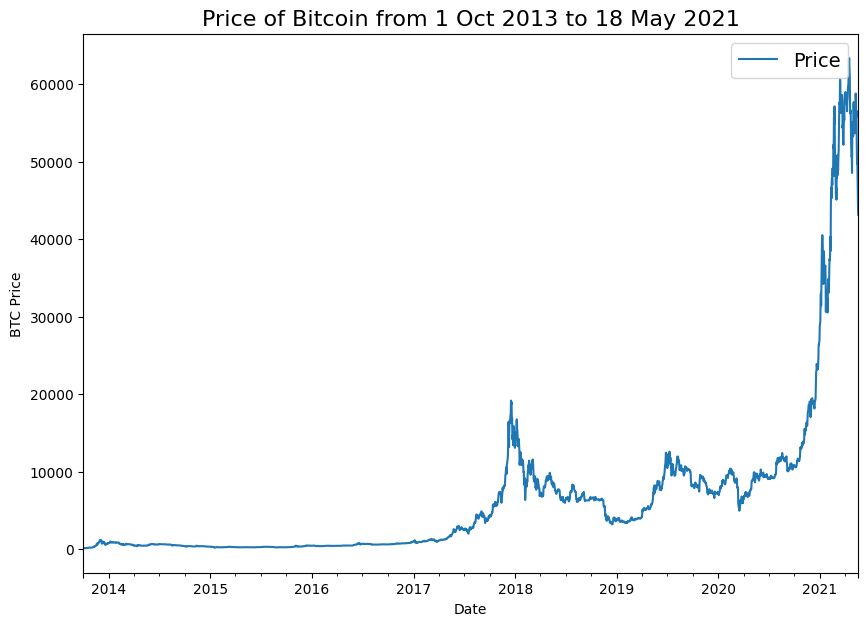

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

### Importing time series data with Python's CSV module


In [8]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f,delimiter=",")
  next(csv_reader) # Skip first line (to get rid of Column names)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[2])) # get the closing price as float
  
# View first 5 of each
timesteps[:5], btc_price[:5]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0)],
 [123.65499, 125.455, 108.58483, 118.67466, 121.33866])

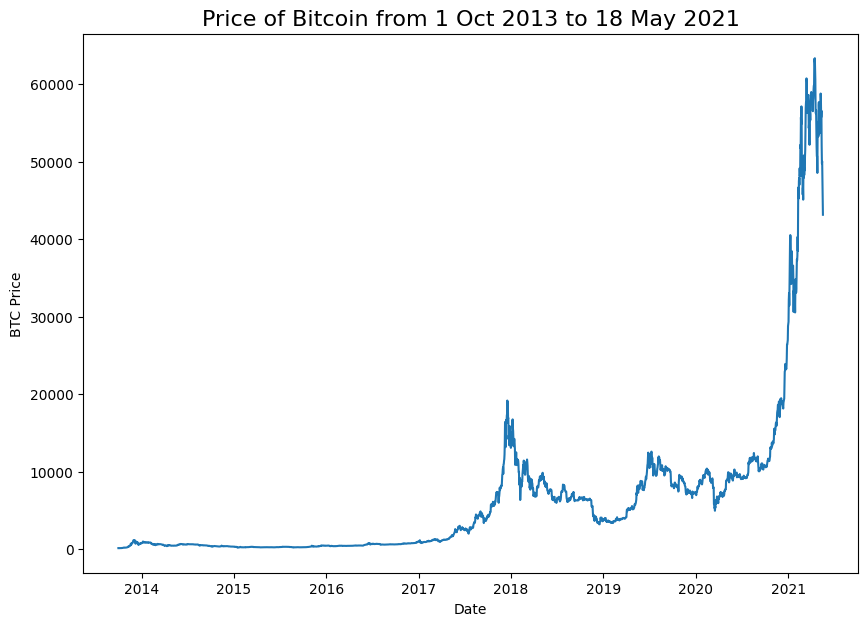

In [9]:
# Plot from CSV
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date");

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way

In [10]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [11]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    timesteps, # dates
    prices, # BTC prices
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
     

((2229,), (558,), (2229,), (558,))

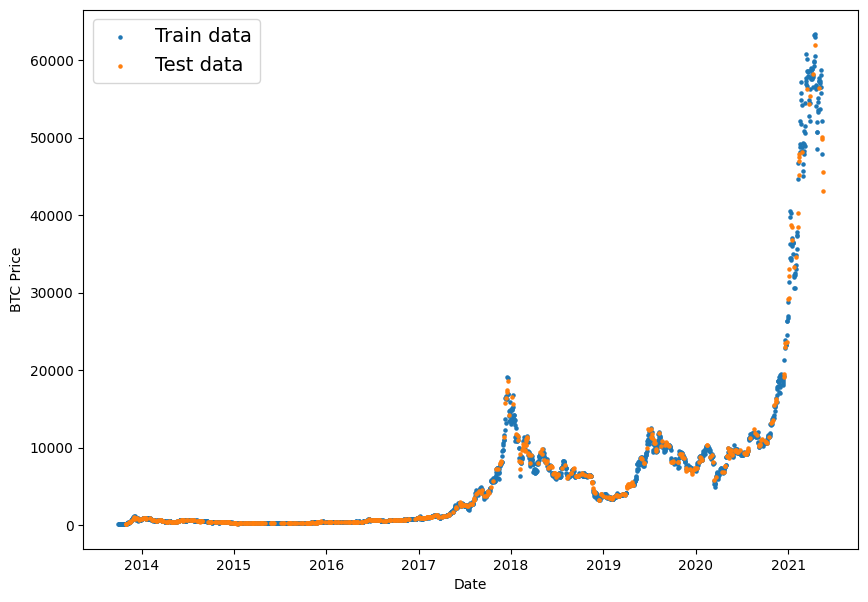

In [13]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create train & test sets for time series (the right way)

In [14]:

# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)
     

(2229, 558, 2229, 558)

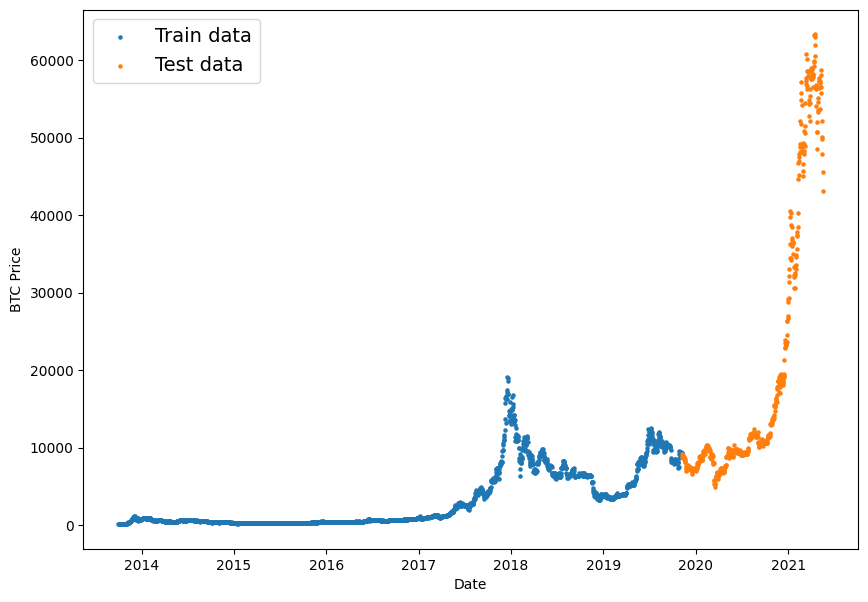

In [15]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create a plotting function
Typing plotting code is tedious, let's functionize it.

In [16]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

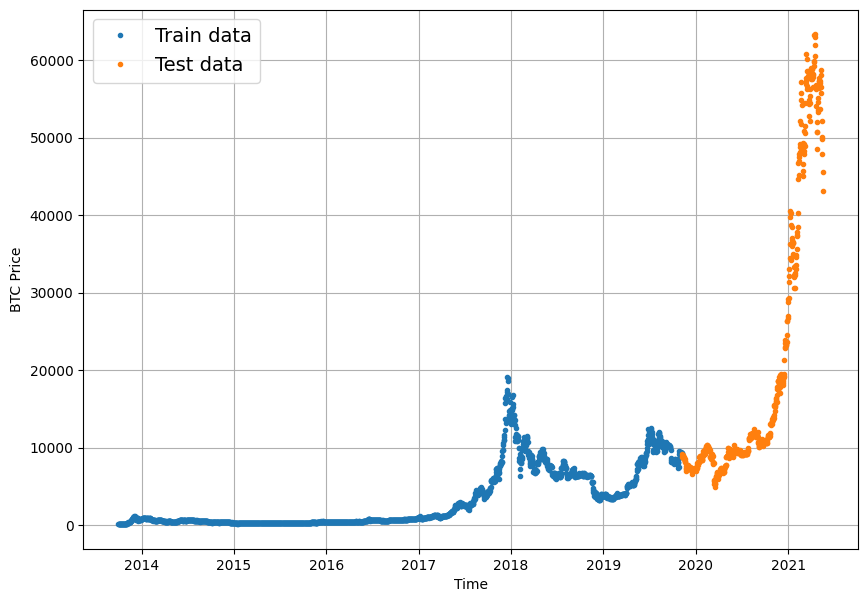

In [17]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments
We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:

* Horizon = number of timesteps into the future we're going to predict
* Window size = number of timesteps we're going to use to predict horizon

Modelling experiments we're running:

* 0 Naïve model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)
The formula looks like this:
$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [18]:
# Create a naive forcast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [19]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

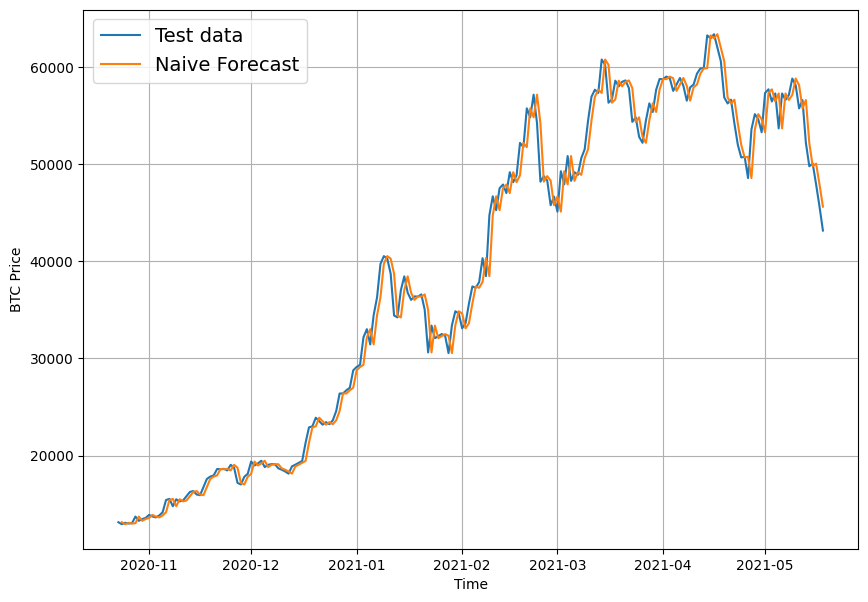

In [20]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")


## Evaluating a time series model
Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
MAPE/sMAPE - (symmetric) mean absolute percentage error
MASE - mean absolute scaled error
For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

> 📖 Resource: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: [Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html)

In [21]:
import tensorflow as tf

In [22]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [23]:
# Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [24]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate varius evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [25]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Other models you can use for baselines and for actual forecasts
In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts



## Format Data Part 2: Windowing our dataset
Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [26]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")


We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [27]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [28]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return (x[:, :-horizon], x[:, -horizon:])


In [29]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")
     

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite lsow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html.

Our function will:

1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon

> 📖 Resource: The function we're about to create has been adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [30]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows 
  of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [31]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [32]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [33]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


## Turning windows into training and test sets


In [34]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [35]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [36]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [37]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116]]))

In [38]:
test_windows[:3], test_labels[:3]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917]]))

In [39]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback
Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [40]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:

* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizaiton and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.

* **Hyperparameters** = values a machine learning practitioner (you!) can adjust themselves
* **Parameters** = values a model learns on its own

In [41]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    # linear activation is the same as having no activation               
    layers.Dense(HORIZON, activation="linear"),
], name="model_1_dense")

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 2994.2283 - mae: 2994.2283 - mse: 23028756.0000  

18/18 [==============================] - 11s 99ms/step - loss: 2244.5789 - mae: 2244.5789 - mse: 15640856.0000 - val_loss: 1320.1627 - val_mae: 1320.1627 - val_mse: 5620529.5000
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 458.5852 - mae: 458.5852 - mse: 795465.0625 - val_loss: 2338.2600 - val_mae: 2338.2600 - val_mse: 12373406.0000
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 268.8166 - mae: 268.8166 - mse: 335271.5625 - val_loss: 1328.8910 - val_mae: 1328.8910 - val_mse: 4963666.5000
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 212.6379 - mae: 212.6379 - mse: 225710.6250

18/18 [==============================] - 1s 32ms/step - loss: 211.7664 - mae: 211.7664 - mse: 222480.0000 - val_loss: 1180.7939 - val_mae: 1180.7939 - val_mse: 4265030.0000
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 207.0575 - mae: 207.0575 - mse: 225235.5781

18/18 [==============================] - 1s 33ms/step - loss: 203.7336 - mae: 203.7336 - mse: 217406.1406 - val_loss: 1133.8541 - val_mae: 1133.8541 - val_mse: 3997777.0000
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 193.8961 - mae: 193.8961 - mse: 194846.6406

18/18 [==============================] - 1s 33ms/step - loss: 193.8961 - mae: 193.8961 - mse: 194846.6406 - val_loss: 1085.0817 - val_mae: 1085.0817 - val_mse: 3931341.2500
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 188.1264 - mae: 188.1264 - mse: 184842.8594 - val_loss: 1087.6300 - val_mae: 1087.6300 - val_mse: 3631909.7500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 162.7776 - mae: 162.7776 - mse: 100983.2812

18/18 [==============================] - 1s 33ms/step - loss: 182.8688 - mae: 182.8688 - mse: 174380.9844 - val_loss: 998.8902 - val_mae: 998.8902 - val_mse: 3264647.2500
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 175.5934 - mae: 175.5934 - mse: 165117.1250

18/18 [==============================] - 1s 33ms/step - loss: 175.5934 - mae: 175.5934 - mse: 165117.1250 - val_loss: 978.1125 - val_mae: 978.1124 - val_mse: 3062494.0000
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 169.8596 - mae: 169.8596 - mse: 155779.0781

18/18 [==============================] - 1s 32ms/step - loss: 169.8596 - mae: 169.8596 - mse: 155779.0781 - val_loss: 928.1525 - val_mae: 928.1525 - val_mse: 2836901.7500
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 162.9715 - mae: 162.9715 - mse: 144595.6094

18/18 [==============================] - 1s 33ms/step - loss: 162.6767 - mae: 162.6767 - mse: 143152.7969 - val_loss: 897.2394 - val_mae: 897.2394 - val_mse: 2654463.0000
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 156.7839 - mae: 156.7839 - mse: 134617.9844 - val_loss: 939.0410 - val_mae: 939.0410 - val_mse: 2653062.5000
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 154.7111 - mae: 154.7111 - mse: 132681.2969 - val_loss: 914.7667 - val_mae: 914.7667 - val_mse: 2509916.0000
Epoch 14/100
16/18 [=========================>....] - ETA: 0s - loss: 145.1640 - mae: 145.1640 - mse: 115925.5469

18/18 [==============================] - 1s 45ms/step - loss: 148.2301 - mae: 148.2301 - mse: 120790.7188 - val_loss: 877.8023 - val_mae: 877.8024 - val_mse: 2336334.2500
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 151.5728 - mae: 151.5728 - mse: 85435.5703

18/18 [==============================] - 1s 33ms/step - loss: 145.1994 - mae: 145.1994 - mse: 116220.1719 - val_loss: 808.9786 - val_mae: 808.9786 - val_mse: 2087373.3750
Epoch 16/100
15/18 [========================>.....] - ETA: 0s - loss: 137.6465 - mae: 137.6465 - mse: 103780.2188

18/18 [==============================] - 1s 32ms/step - loss: 138.1861 - mae: 138.1861 - mse: 106415.8828 - val_loss: 787.1569 - val_mae: 787.1569 - val_mse: 1966245.1250
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 134.2812 - mae: 134.2812 - mse: 103142.9922 - val_loss: 811.6023 - val_mae: 811.6023 - val_mse: 1985972.0000
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 134.8105 - mae: 134.8105 - mse: 103248.2812

18/18 [==============================] - 1s 33ms/step - loss: 133.7357 - mae: 133.7357 - mse: 101854.5312 - val_loss: 760.9273 - val_mae: 760.9273 - val_mse: 1814561.5000
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 129.3468 - mae: 129.3468 - mse: 96320.1719

18/18 [==============================] - 1s 33ms/step - loss: 128.4358 - mae: 128.4358 - mse: 95589.1719 - val_loss: 754.3560 - val_mae: 754.3560 - val_mse: 1766592.0000
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 141.3467 - mae: 141.3467 - mse: 107150.9062

18/18 [==============================] - 1s 43ms/step - loss: 126.5599 - mae: 126.5599 - mse: 93047.2422 - val_loss: 694.1467 - val_mae: 694.1467 - val_mse: 1648610.5000
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 128.7709 - mae: 128.7709 - mse: 91520.7266 

18/18 [==============================] - 1s 48ms/step - loss: 128.3923 - mae: 128.3923 - mse: 95420.3594 - val_loss: 681.2758 - val_mae: 681.2758 - val_mse: 1553124.7500
Epoch 22/100
18/18 [==============================] - 0s 10ms/step - loss: 124.9457 - mae: 124.9457 - mse: 90485.2812 - val_loss: 721.6412 - val_mae: 721.6412 - val_mse: 1620329.7500
Epoch 23/100
12/18 [===================>..........] - ETA: 0s - loss: 121.2012 - mae: 121.2012 - mse: 74684.7422

18/18 [==============================] - 1s 50ms/step - loss: 127.4554 - mae: 127.4554 - mse: 90161.3672 - val_loss: 670.1744 - val_mae: 670.1744 - val_mse: 1489767.8750
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 128.9193 - mae: 128.9193 - mse: 81956.7344

18/18 [==============================] - 1s 33ms/step - loss: 123.4457 - mae: 123.4457 - mse: 88895.0859 - val_loss: 656.7187 - val_mae: 656.7187 - val_mse: 1483811.8750
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 126.1923 - mae: 126.1923 - mse: 61628.6250

18/18 [==============================] - 1s 32ms/step - loss: 121.5786 - mae: 121.5786 - mse: 84961.9922 - val_loss: 647.1659 - val_mae: 647.1659 - val_mse: 1426818.1250
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 110.8063 - mae: 110.8063 - mse: 55604.3906

18/18 [==============================] - 1s 34ms/step - loss: 119.0199 - mae: 119.0199 - mse: 83264.9531 - val_loss: 644.5652 - val_mae: 644.5652 - val_mse: 1407184.3750
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 120.7066 - mae: 120.7066 - mse: 83772.5547 

18/18 [==============================] - 1s 35ms/step - loss: 120.7066 - mae: 120.7066 - mse: 83772.5547 - val_loss: 642.0855 - val_mae: 642.0855 - val_mse: 1420138.1250
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 116.6834 - mae: 116.6834 - mse: 81089.5078 - val_loss: 645.6229 - val_mae: 645.6229 - val_mse: 1392434.8750
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 120.3706 - mae: 120.3706 - mse: 82902.5781

18/18 [==============================] - 1s 33ms/step - loss: 120.3706 - mae: 120.3706 - mse: 82902.5781 - val_loss: 630.0617 - val_mae: 630.0617 - val_mse: 1373121.3750
Epoch 30/100
18/18 [==============================] - ETA: 0s - loss: 118.9656 - mae: 118.9656 - mse: 81734.1719

18/18 [==============================] - 1s 33ms/step - loss: 118.9656 - mae: 118.9656 - mse: 81734.1719 - val_loss: 621.5978 - val_mae: 621.5978 - val_mse: 1341129.0000
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 116.0299 - mae: 116.0299 - mse: 78404.5000

18/18 [==============================] - 1s 33ms/step - loss: 116.0299 - mae: 116.0299 - mse: 78404.5000 - val_loss: 619.3695 - val_mae: 619.3695 - val_mse: 1324934.1250
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2421 - mae: 115.2421 - mse: 80130.4219 - val_loss: 620.4216 - val_mae: 620.4216 - val_mse: 1321049.5000
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 142.3880 - mae: 142.3880 - mse: 141695.2656

18/18 [==============================] - 1s 47ms/step - loss: 113.3580 - mae: 113.3580 - mse: 78068.0469 - val_loss: 616.9379 - val_mae: 616.9379 - val_mse: 1309968.5000
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3840 - mae: 113.3840 - mse: 78753.1328 - val_loss: 652.2531 - val_mae: 652.2531 - val_mse: 1425021.5000
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 113.8875 - mae: 113.8875 - mse: 79278.3281

18/18 [==============================] - 1s 34ms/step - loss: 113.9121 - mae: 113.9121 - mse: 78522.0781 - val_loss: 604.5634 - val_mae: 604.5634 - val_mse: 1283481.1250
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9923 - mae: 113.9923 - mse: 75418.8594 - val_loss: 604.6075 - val_mae: 604.6075 - val_mse: 1277752.0000
Epoch 37/100
15/18 [========================>.....] - ETA: 0s - loss: 115.8275 - mae: 115.8275 - mse: 78350.1953 

18/18 [==============================] - 1s 34ms/step - loss: 113.4091 - mae: 113.4091 - mse: 76890.7188 - val_loss: 603.6346 - val_mae: 603.6346 - val_mse: 1272469.6250
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 100.4379 - mae: 100.4379 - mse: 67110.1953

18/18 [==============================] - 1s 32ms/step - loss: 112.7245 - mae: 112.7245 - mse: 76909.4219 - val_loss: 598.0629 - val_mae: 598.0629 - val_mse: 1264585.3750
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2032 - mae: 113.2032 - mse: 77358.9141 - val_loss: 600.3533 - val_mae: 600.3533 - val_mse: 1260739.7500
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 111.2570 - mae: 111.2570 - mse: 75687.7969

18/18 [==============================] - 1s 33ms/step - loss: 110.8522 - mae: 110.8522 - mse: 74928.9766 - val_loss: 596.7100 - val_mae: 596.7100 - val_mse: 1259046.0000
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 110.6894 - mae: 110.6894 - mse: 74236.1484

18/18 [==============================] - 1s 33ms/step - loss: 110.6894 - mae: 110.6894 - mse: 74236.1484 - val_loss: 594.0175 - val_mae: 594.0175 - val_mse: 1249325.3750
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 114.7617 - mae: 114.7617 - mse: 78485.7109 - val_loss: 751.4069 - val_mae: 751.4069 - val_mse: 1627359.5000
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 124.9110 - mae: 124.9110 - mse: 79487.7109 - val_loss: 729.8691 - val_mae: 729.8691 - val_mse: 1632870.0000
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 125.9778 - mae: 125.9778 - mse: 82902.5703 - val_loss: 672.0906 - val_mae: 672.0906 - val_mse: 1456673.6250
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 115.6229 - mae: 115.6229 - mse: 78331.3047 - val_loss: 595.5980 - val_mae: 595.5980 - val_mse: 1242039.5000
Epoch 46/100
16/18 [=========================>....] - ETA: 0s - loss: 113.1735 - mae: 113.1735 - mse: 

18/18 [==============================] - 1s 33ms/step - loss: 113.0809 - mae: 113.0809 - mse: 74632.0234 - val_loss: 586.6398 - val_mae: 586.6398 - val_mse: 1228112.6250
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6638 - mae: 113.6638 - mse: 76131.1328 - val_loss: 645.0030 - val_mae: 645.0030 - val_mse: 1341710.2500
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0227 - mae: 111.0227 - mse: 75392.6562 - val_loss: 587.1059 - val_mae: 587.1059 - val_mse: 1221777.8750
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9465 - mae: 110.9465 - mse: 75088.0859 - val_loss: 682.8439 - val_mae: 682.8439 - val_mse: 1423107.0000
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 116.5863 - mae: 116.5863 - mse: 77158.1875 - val_loss: 695.1987 - val_mae: 695.1987 - val_mse: 1515528.0000
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 115.9249 - mae: 115.9249 - m

18/18 [==============================] - 1s 44ms/step - loss: 113.2203 - mae: 113.2203 - mse: 76150.9531 - val_loss: 583.9765 - val_mae: 583.9765 - val_mse: 1217431.3750
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 109.8259 - mae: 109.8259 - mse: 73585.5625 - val_loss: 633.5325 - val_mae: 633.5325 - val_mse: 1309058.0000
Epoch 54/100
13/18 [====================>.........] - ETA: 0s - loss: 108.8853 - mae: 108.8853 - mse: 68772.4531

18/18 [==============================] - 1s 48ms/step - loss: 110.4857 - mae: 110.4857 - mse: 72868.1094 - val_loss: 580.2660 - val_mae: 580.2660 - val_mse: 1208835.2500
Epoch 55/100
18/18 [==============================] - 0s 8ms/step - loss: 110.4834 - mae: 110.4834 - mse: 74373.9922 - val_loss: 581.5577 - val_mae: 581.5577 - val_mse: 1205588.5000
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 106.9874 - mae: 106.9874 - mse: 71166.6016 - val_loss: 733.8885 - val_mae: 733.8885 - val_mse: 1623813.5000
Epoch 57/100
18/18 [==============================] - 0s 8ms/step - loss: 114.6633 - mae: 114.6633 - mse: 76749.1406 - val_loss: 603.4796 - val_mae: 603.4796 - val_mse: 1241964.0000
Epoch 58/100
13/18 [====================>.........] - ETA: 0s - loss: 106.7977 - mae: 106.7977 - mse: 74241.0312

18/18 [==============================] - 1s 41ms/step - loss: 107.3647 - mae: 107.3647 - mse: 71586.8828 - val_loss: 578.4499 - val_mae: 578.4499 - val_mse: 1196582.5000
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 107.6901 - mae: 107.6901 - mse: 72012.4297 - val_loss: 618.2444 - val_mae: 618.2444 - val_mse: 1296521.1250
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2830 - mae: 111.2830 - mse: 74823.3281 - val_loss: 655.0489 - val_mae: 655.0489 - val_mse: 1353387.1250
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5794 - mae: 111.5794 - mse: 74714.5859 - val_loss: 595.2072 - val_mae: 595.2072 - val_mse: 1239051.0000
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 106.6801 - mae: 106.6801 - mse: 70403.5234 - val_loss: 581.9856 - val_mae: 581.9856 - val_mse: 1206069.7500
Epoch 63/100
17/18 [===========================>..] - ETA: 0s - loss: 109.0913 - mae: 109.0913 - mse: 

18/18 [==============================] - 1s 32ms/step - loss: 108.9872 - mae: 108.9872 - mse: 71978.1094 - val_loss: 574.9631 - val_mae: 574.9631 - val_mse: 1185267.0000
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 106.5812 - mae: 106.5812 - mse: 70700.8672 - val_loss: 618.3688 - val_mae: 618.3688 - val_mse: 1266990.3750
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0064 - mae: 108.0064 - mse: 71817.3359 - val_loss: 593.7103 - val_mae: 593.7103 - val_mse: 1217058.7500
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3646 - mae: 110.3646 - mse: 72494.7422 - val_loss: 594.1320 - val_mae: 594.1320 - val_mse: 1217384.2500
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1570 - mae: 111.1570 - mse: 73695.9453 - val_loss: 649.6226 - val_mae: 649.6226 - val_mse: 1368158.7500
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 121.3965 - mae: 121.3965 - m

18/18 [==============================] - 1s 33ms/step - loss: 110.6944 - mae: 110.6944 - mse: 73677.8438 - val_loss: 572.6111 - val_mae: 572.6111 - val_mse: 1173248.7500
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5746 - mae: 107.5746 - mse: 70972.6875 - val_loss: 576.5822 - val_mae: 576.5822 - val_mse: 1181777.6250
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 108.2481 - mae: 108.2481 - mse: 69504.3359 - val_loss: 587.2964 - val_mae: 587.2964 - val_mse: 1215120.6250
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0921 - mae: 108.0921 - mse: 70925.6562 - val_loss: 584.6586 - val_mae: 584.6586 - val_mse: 1208319.0000
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2381 - mae: 111.2381 - mse: 74264.1953 - val_loss: 637.4517 - val_mae: 637.4517 - val_mse: 1304354.5000
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 108.1478 - mae: 108.1478 - m

18/18 [==============================] - 1s 32ms/step - loss: 118.2096 - mae: 118.2096 - mse: 79314.6016 - val_loss: 572.4786 - val_mae: 572.4786 - val_mse: 1172342.5000
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4305 - mae: 114.4305 - mse: 75157.1562 - val_loss: 719.0247 - val_mae: 719.0247 - val_mse: 1550317.1250
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6780 - mae: 115.6780 - mse: 75639.7500 - val_loss: 572.5635 - val_mae: 572.5635 - val_mse: 1173443.6250
Epoch 85/100
17/18 [===========================>..] - ETA: 0s - loss: 105.3923 - mae: 105.3923 - mse: 68077.1953

18/18 [==============================] - 1s 33ms/step - loss: 106.9914 - mae: 106.9914 - mse: 71293.8750 - val_loss: 570.8161 - val_mae: 570.8161 - val_mse: 1174066.7500
Epoch 86/100
16/18 [=========================>....] - ETA: 0s - loss: 106.3109 - mae: 106.3109 - mse: 67029.0078

18/18 [==============================] - 1s 32ms/step - loss: 107.3286 - mae: 107.3286 - mse: 70109.0000 - val_loss: 569.6313 - val_mae: 569.6313 - val_mse: 1169410.8750
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 105.3427 - mae: 105.3427 - mse: 69179.7734 - val_loss: 585.2307 - val_mae: 585.2307 - val_mse: 1208172.8750
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3890 - mae: 109.3890 - mse: 71284.0078 - val_loss: 570.1957 - val_mae: 570.1957 - val_mse: 1170992.6250
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 110.4232 - mae: 110.4232 - mse: 70594.0234 - val_loss: 590.3696 - val_mae: 590.3696 - val_mse: 1203027.3750
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 112.1791 - mae: 112.1791 - mse: 69383.2188 - val_loss: 618.6946 - val_mae: 618.6946 - val_mse: 1263232.2500
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8038 - mae: 111.8038 - m

18/18 [==============================] - 1s 31ms/step - loss: 111.6613 - mae: 111.6613 - mse: 73585.4453 - val_loss: 569.3675 - val_mae: 569.3675 - val_mse: 1168803.1250
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 119.1703 - mae: 119.1703 - mse: 78171.9531 - val_loss: 628.7182 - val_mae: 628.7182 - val_mse: 1307375.8750
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3387 - mae: 112.3387 - mse: 73950.6719 - val_loss: 613.9748 - val_mae: 613.9748 - val_mse: 1251698.1250
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2422 - mae: 107.2422 - mse: 68454.3906 - val_loss: 585.1988 - val_mae: 585.1988 - val_mse: 1208540.7500
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 109.3690 - mae: 109.3690 - mse: 70507.0469 - val_loss: 631.2835 - val_mae: 631.2835 - val_mse: 1313792.2500
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4943 - mae: 110.4943 - m

18/18 [==============================] - 1s 47ms/step - loss: 108.4992 - mae: 108.4992 - mse: 71424.9531 - val_loss: 568.1439 - val_mae: 568.1439 - val_mse: 1161315.6250
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 119.2297 - mae: 119.2297 - mse: 74081.6719 - val_loss: 723.0303 - val_mae: 723.0303 - val_mse: 1517565.0000


In [42]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 723.0303 - mae: 723.0303 - mse: 1517564.7500


[723.0303344726562, 723.0303344726562, 1517564.75]

In [43]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.1438 - mae: 568.1438 - mse: 1161315.3750


[568.143798828125, 568.143798828125, 1161315.375]

## Making forecasts with a model (on the test dataset)
To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's predict() method
4. Returns the predictions

In [44]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [45]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows) 
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8840.058, 8754.884, 9036.656, 8749.108, 8714.527, 8765.626,
        8666.616, 8486.953, 8467.232, 8518.279], dtype=float32)>)

In [46]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([556]), TensorShape([556]))

In [47]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.1438,
 'mse': 1161315.4,
 'rmse': 1077.6434,
 'mape': 2.5392282,
 'mase': 0.9980713}

In [48]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

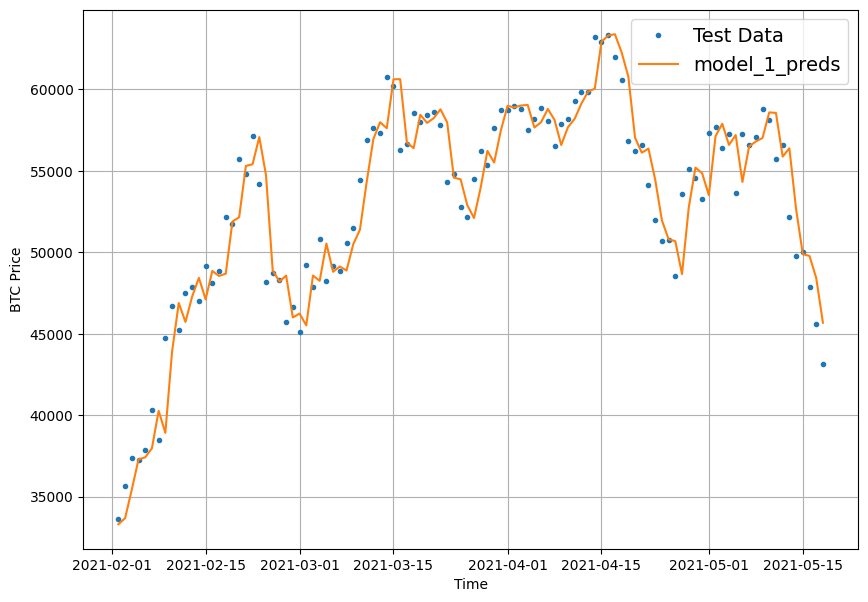

In [49]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format="-",
                 label="model_1_preds")


## Model 2: Dense (window = 30, horizon = 1)

In [50]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [51]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [52]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [53]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [54]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 598.2176


598.2175903320312

In [55]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 598.2176


598.2175903320312

In [56]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [57]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([552]), TensorShape([552]))

In [58]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 598.2175,
 'mse': 1272832.1,
 'rmse': 1128.1986,
 'mape': 2.7367842,
 'mase': 1.0456902}

In [59]:
model_1_results

{'mae': 568.1438,
 'mse': 1161315.4,
 'rmse': 1077.6434,
 'mape': 2.5392282,
 'mase': 0.9980713}

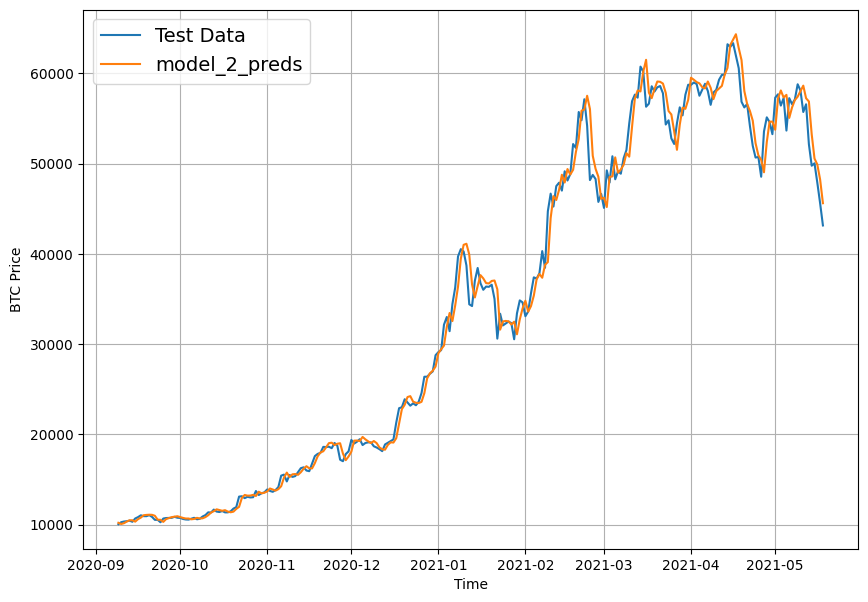

In [60]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")


## Model 3: Dense (window = 30, horizon = 7)

In [61]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [62]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [63]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [64]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1398.9467


1398.9466552734375

In [65]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1248.4399


1248.43994140625

In [66]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9307.225, 9217.437, 9441.632, 9532.159, 9566.285, 9561.005,
        9453.753],
       [9063.198, 8784.891, 9245.495, 9405.088, 9283.609, 9498.042,
        9284.675],
       [8996.441, 8756.06 , 9036.45 , 9136.79 , 9073.017, 9505.598,
        9336.296],
       [9057.678, 9041.637, 9094.806, 8995.172, 9131.619, 9634.507,
        9250.262],
       [8787.057, 8712.065, 9101.922, 8930.715, 8898.113, 9328.82 ,
        8854.917]], dtype=float32)>

In [67]:
model_2_results

{'mae': 598.2175,
 'mse': 1272832.1,
 'rmse': 1128.1986,
 'mape': 2.7367842,
 'mase': 1.0456902}

In [68]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([551, 7]), TensorShape([552]), TensorShape([556]))

In [69]:
# Evaluate model_3 results (these are going multi-dimensional because we're trying to predict more than one timestep at a time)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  646.7129  ,   556.9714  ,   440.01898 ,   545.6454  ,
          401.155   ,   384.0804  ,   519.2465  ,   593.2824  ,
          557.58435 ,   548.92786 ,   759.72943 ,   807.7204  ,
          848.6006  ,   828.2463  ,   583.75476 ,   247.96875 ,
          111.8538  ,   181.92424 ,   272.44455 ,   263.66608 ,
          158.75809 ,   162.06194 ,   302.80475 ,   371.81906 ,
          190.97433 ,   135.17404 ,   135.7507  ,   147.44106 ,
          160.53502 ,   195.30434 ,   223.46785 ,   347.94928 ,
          261.09732 ,   316.55307 ,   266.83014 ,   225.26793 ,
          322.30142 ,   238.97426 ,   176.68883 ,   198.76723 ,
          450.09213 ,   148.11691 ,    82.28516 ,   188.95068 ,
           99.71324 ,   101.666016,    55.430035,    87.7846  ,
          115.27128 ,   143.48228 ,   122.16344 ,   114.34333 ,
          134.9647  ,   175.58377 ,   191.01277 ,   304.1697  ,
          524.5279  ,   523.8833  ,   526.0875  ,   576.85315 ,
          408.04507 ,   202.44615

### Make our evaluation function work for larger horizons

In [70]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1248.4399


1248.43994140625

In [71]:
tf.reduce_mean(model_3_results["mae"]).numpy()

1248.44

In [72]:
model_2_results["mae"].ndim

0

In [73]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [74]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1248.44,
 'mse': 5494925.5,
 'rmse': 1439.1113,
 'mape': 5.584575,
 'mase': 2.2215288}

In [75]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9307.225, 9217.437, 9441.632, 9532.159, 9566.285, 9561.005,
        9453.753],
       [9063.198, 8784.891, 9245.495, 9405.088, 9283.609, 9498.042,
        9284.675],
       [8996.441, 8756.06 , 9036.45 , 9136.79 , 9073.017, 9505.598,
        9336.296],
       [9057.678, 9041.637, 9094.806, 8995.172, 9131.619, 9634.507,
        9250.262],
       [8787.057, 8712.065, 9101.922, 8930.715, 8898.113, 9328.82 ,
        8854.917]], dtype=float32)>

In [76]:
test_labels[:]

array([[ 8794.35864452,  8798.04205463,  9081.18687849, ...,
         8760.89271814,  8749.52059102,  8656.97092235],
       [ 8798.04205463,  9081.18687849,  8711.53433917, ...,
         8749.52059102,  8656.97092235,  8500.64355816],
       [ 9081.18687849,  8711.53433917,  8760.89271814, ...,
         8656.97092235,  8500.64355816,  8469.2608989 ],
       ...,
       [58102.19142623, 55715.54665129, 56573.5554719 , ...,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, ...,
        50032.69313676, 47885.62525472, 45604.61575361],
       [56573.5554719 , 52147.82118698, 49764.1320816 , ...,
        47885.62525472, 45604.61575361, 43144.47129086]])

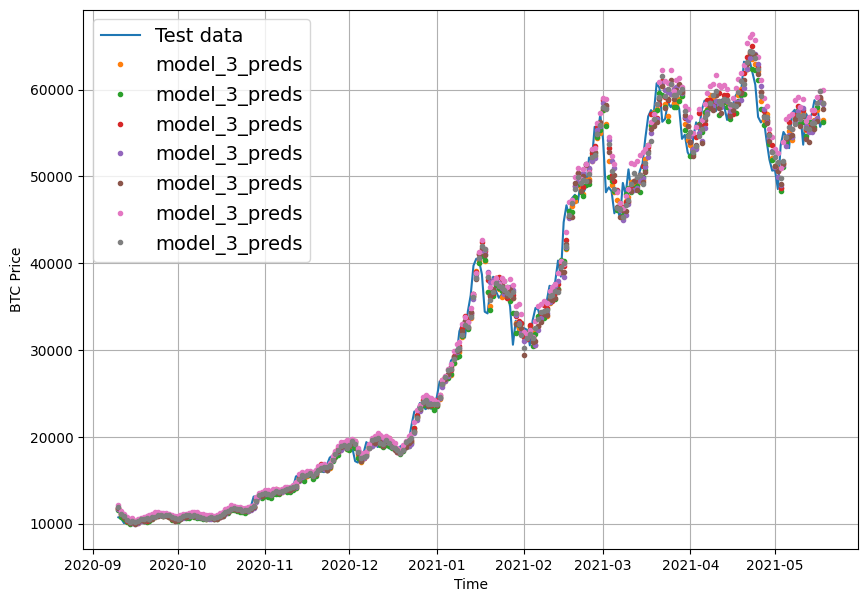

In [77]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")


In [78]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([9307.225, 9217.437, 9441.632, 9532.159, 9566.285, 9561.005,
       9453.753], dtype=float32)>

In [79]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=9439.929>

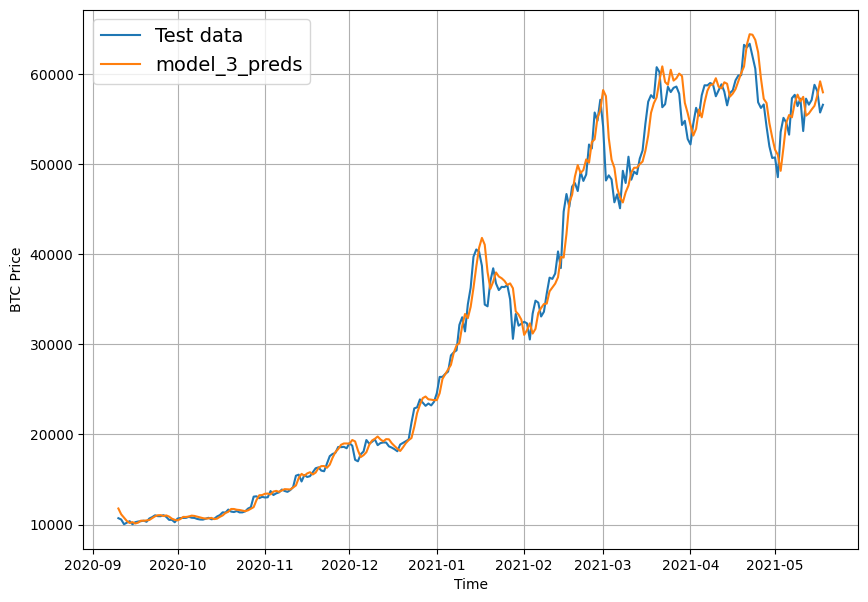

In [80]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="model_3_preds")

## Which of our models is performing the best so far?
So we've trained a few models, now let's compare them and see how they've gone...

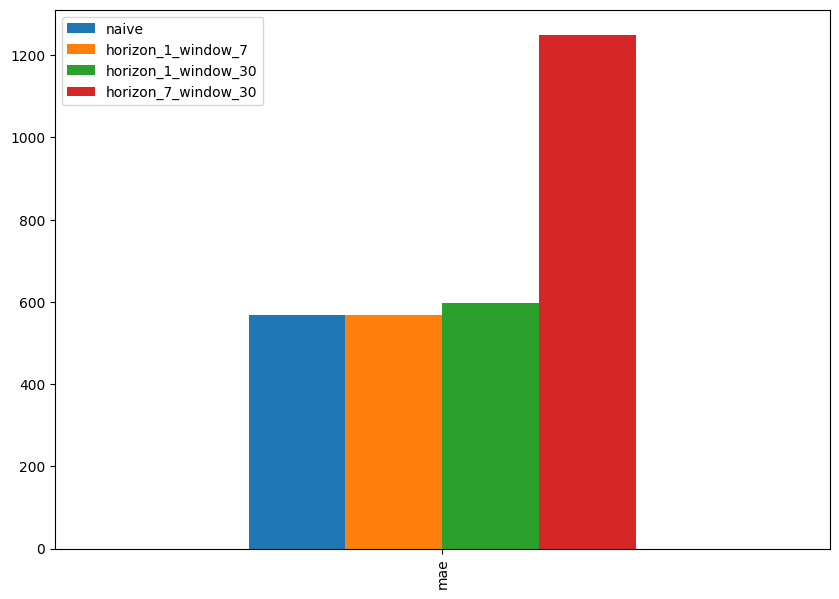

In [81]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, 
              index=["mae"]).plot(figsize=(10, 7), kind="bar");

> 🔑 Note: You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly), a naïve model will often get fairly good results.

> 📖 Resource: For more on how autocorrelation influences a model's predictions, see the article [How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls by Vegard Flovik.](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424)

## Model 4: Conv1D

In [82]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [83]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [84]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`...

However our data isn't in that shape yet...

In [85]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [86]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [87]:
# add an extra dimension for `input_dim`
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) 

In [88]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [89]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(128, 5, 1, "causal", activation='relu'),
    layers.Dense(HORIZON),
], name="model_4_conv1d")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 1914.1165  

18/18 [==============================] - 7s 78ms/step - loss: 1784.5575 - val_loss: 3895.5444
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 316.3854

18/18 [==============================] - 1s 46ms/step - loss: 312.4347 - val_loss: 1057.8427
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 209.9011

18/18 [==============================] - 1s 47ms/step - loss: 206.3549 - val_loss: 1052.4303
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 190.0884

18/18 [==============================] - 1s 47ms/step - loss: 190.4897 - val_loss: 1042.9518
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 189.7207

18/18 [==============================] - 1s 50ms/step - loss: 186.4308 - val_loss: 1033.3485
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 187.6533 - val_loss: 1040.0752
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 188.4495

18/18 [==============================] - 1s 45ms/step - loss: 187.7293 - val_loss: 1009.9754
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 178.1114

18/18 [==============================] - 1s 46ms/step - loss: 180.5988 - val_loss: 999.0571
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 177.6236 - val_loss: 1014.7039
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 169.1364

18/18 [==============================] - 1s 47ms/step - loss: 175.3220 - val_loss: 988.6917
Epoch 11/100
13/18 [====================>.........] - ETA: 0s - loss: 178.6413

18/18 [==============================] - 1s 47ms/step - loss: 173.4653 - val_loss: 957.2974
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 171.5015 - val_loss: 990.6044
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 168.3038 - val_loss: 979.7540
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 165.3851 - val_loss: 961.9677
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 167.1933

18/18 [==============================] - 1s 46ms/step - loss: 165.8978 - val_loss: 910.7474
Epoch 16/100
14/18 [======================>.......] - ETA: 0s - loss: 159.5212

18/18 [==============================] - 1s 62ms/step - loss: 159.6941 - val_loss: 902.9738
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 157.5590 - val_loss: 917.5385
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 155.2886 - val_loss: 906.1359
Epoch 19/100
11/18 [=================>............] - ETA: 0s - loss: 160.2404

18/18 [==============================] - 1s 68ms/step - loss: 153.3784 - val_loss: 868.2624
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 151.0686

18/18 [==============================] - 1s 49ms/step - loss: 149.0873 - val_loss: 825.2836
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 146.7297 - val_loss: 828.2877
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 146.2755

18/18 [==============================] - 1s 70ms/step - loss: 143.9168 - val_loss: 812.5646
Epoch 23/100
16/18 [=========================>....] - ETA: 0s - loss: 139.5600

18/18 [==============================] - 1s 49ms/step - loss: 141.2193 - val_loss: 799.9838
Epoch 24/100
18/18 [==============================] - 0s 6ms/step - loss: 140.1165 - val_loss: 809.5558
Epoch 25/100
13/18 [====================>.........] - ETA: 0s - loss: 139.9058

18/18 [==============================] - 1s 46ms/step - loss: 136.7188 - val_loss: 764.2535
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 134.3094

18/18 [==============================] - 1s 46ms/step - loss: 134.5733 - val_loss: 738.9518
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 132.7505

18/18 [==============================] - 1s 46ms/step - loss: 133.2599 - val_loss: 727.9329
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 126.9818

18/18 [==============================] - 1s 45ms/step - loss: 130.3899 - val_loss: 718.2422
Epoch 29/100
17/18 [===========================>..] - ETA: 0s - loss: 128.5058

18/18 [==============================] - 1s 44ms/step - loss: 130.6804 - val_loss: 705.3904
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 128.8591 - val_loss: 832.3973
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 136.4319 - val_loss: 784.4437
Epoch 32/100
16/18 [=========================>....] - ETA: 0s - loss: 128.4842

18/18 [==============================] - 1s 44ms/step - loss: 130.8497 - val_loss: 681.1190
Epoch 33/100
15/18 [========================>.....] - ETA: 0s - loss: 128.9285

18/18 [==============================] - 1s 45ms/step - loss: 127.8097 - val_loss: 675.1345
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 121.7069

18/18 [==============================] - 1s 45ms/step - loss: 122.5164 - val_loss: 667.4186
Epoch 35/100
16/18 [=========================>....] - ETA: 0s - loss: 121.2204

18/18 [==============================] - 1s 53ms/step - loss: 121.0280 - val_loss: 660.0962
Epoch 36/100
18/18 [==============================] - 0s 8ms/step - loss: 124.3996 - val_loss: 711.6396
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 118.8251

18/18 [==============================] - 2s 93ms/step - loss: 121.3176 - val_loss: 654.0244
Epoch 38/100
10/18 [===============>..............] - ETA: 0s - loss: 124.1556

18/18 [==============================] - 1s 50ms/step - loss: 118.5628 - val_loss: 640.6052
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 118.5831 - val_loss: 674.2112
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 117.4600

18/18 [==============================] - 1s 46ms/step - loss: 117.1221 - val_loss: 632.3776
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 118.1584

18/18 [==============================] - 1s 46ms/step - loss: 117.3444 - val_loss: 632.1891
Epoch 42/100
17/18 [===========================>..] - ETA: 0s - loss: 121.2869

18/18 [==============================] - 1s 49ms/step - loss: 120.1835 - val_loss: 621.9025
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2639 - val_loss: 623.0172
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 117.0289 - val_loss: 658.9138
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 116.0178

18/18 [==============================] - 1s 46ms/step - loss: 116.9652 - val_loss: 620.9311
Epoch 46/100
14/18 [======================>.......] - ETA: 0s - loss: 117.9066

18/18 [==============================] - 1s 45ms/step - loss: 114.8493 - val_loss: 610.5494
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 114.9049 - val_loss: 681.6296
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0295 - val_loss: 627.5473
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 114.5108 - val_loss: 634.3423
Epoch 50/100
14/18 [======================>.......] - ETA: 0s - loss: 115.2102

18/18 [==============================] - 1s 46ms/step - loss: 118.5620 - val_loss: 608.1225
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3738 - val_loss: 626.3768
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 114.6570 - val_loss: 616.7297
Epoch 53/100
12/18 [===================>..........] - ETA: 0s - loss: 117.1529

18/18 [==============================] - 1s 47ms/step - loss: 117.4996 - val_loss: 598.4764
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6302 - val_loss: 631.0005
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 116.0421 - val_loss: 611.4634
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 115.8237 - val_loss: 761.9621
Epoch 57/100
13/18 [====================>.........] - ETA: 0s - loss: 138.8154

18/18 [==============================] - 1s 47ms/step - loss: 132.1542 - val_loss: 593.0902
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 116.4664 - val_loss: 612.4193
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0389 - val_loss: 605.0753
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8284 - val_loss: 611.3161
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2726 - val_loss: 611.5851
Epoch 62/100
12/18 [===================>..........] - ETA: 0s - loss: 111.1752

18/18 [==============================] - 1s 45ms/step - loss: 111.9573 - val_loss: 592.7151
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 112.2089 - val_loss: 597.7573
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7566 - val_loss: 644.6360
Epoch 65/100
18/18 [==============================] - 0s 12ms/step - loss: 113.7772 - val_loss: 608.9933
Epoch 66/100
11/18 [=================>............] - ETA: 0s - loss: 107.5160

18/18 [==============================] - 1s 68ms/step - loss: 111.6555 - val_loss: 587.7230
Epoch 67/100
18/18 [==============================] - 0s 9ms/step - loss: 111.1564 - val_loss: 628.7637
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 116.1032 - val_loss: 646.0259
Epoch 69/100
18/18 [==============================] - 0s 9ms/step - loss: 120.2711 - val_loss: 627.2598
Epoch 70/100
18/18 [==============================] - 0s 9ms/step - loss: 119.4187 - val_loss: 589.8241
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 110.8810 - val_loss: 597.2068
Epoch 72/100
11/18 [=================>............] - ETA: 0s - loss: 112.1104

18/18 [==============================] - 1s 74ms/step - loss: 110.7594 - val_loss: 586.9428
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 110.2043 - val_loss: 611.6755
Epoch 74/100
15/18 [========================>.....] - ETA: 0s - loss: 109.4466

18/18 [==============================] - 1s 46ms/step - loss: 109.9537 - val_loss: 581.9385
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0331 - val_loss: 606.2398
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 112.3929

18/18 [==============================] - 1s 43ms/step - loss: 112.4727 - val_loss: 580.9177
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 111.6957 - val_loss: 582.5572
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 110.3733 - val_loss: 581.8535
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 111.3029 - val_loss: 606.5425
Epoch 80/100
16/18 [=========================>....] - ETA: 0s - loss: 113.1848

18/18 [==============================] - 1s 46ms/step - loss: 112.5993 - val_loss: 579.4893
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7005 - val_loss: 584.4294
Epoch 82/100
18/18 [==============================] - ETA: 0s - loss: 114.2050

18/18 [==============================] - 1s 42ms/step - loss: 114.2050 - val_loss: 577.4305
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7605 - val_loss: 648.2891
Epoch 84/100
17/18 [===========================>..] - ETA: 0s - loss: 113.5012

18/18 [==============================] - 1s 44ms/step - loss: 113.0408 - val_loss: 576.0392
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4806 - val_loss: 578.4294
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 109.7340 - val_loss: 655.0431
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 114.1541 - val_loss: 595.6279
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1263 - val_loss: 576.3647
Epoch 89/100
16/18 [=========================>....] - ETA: 0s - loss: 105.5777

18/18 [==============================] - 1s 42ms/step - loss: 110.3249 - val_loss: 573.4656
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3269 - val_loss: 700.5089
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4509 - val_loss: 577.5510
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3642 - val_loss: 591.1350
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 111.5919 - val_loss: 620.7841
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3062 - val_loss: 578.0761
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5603 - val_loss: 579.9745
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7566 - val_loss: 594.8988
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5578 - val_loss: 614.5287
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 10

18/18 [==============================] - 1s 45ms/step - loss: 108.1574 - val_loss: 571.7501
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6197 - val_loss: 615.2848


In [90]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Evaluate model... 
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 615.2849


615.2848510742188

In [92]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 571.7500


571.75

In [93]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8891.049, 8780.163, 8983.575, 8785.561, 8758.542, 8737.771,
       8673.285, 8537.378, 8463.595, 8510.432], dtype=float32)>

In [94]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 571.75,
 'mse': 1183783.2,
 'rmse': 1088.0181,
 'mape': 2.569297,
 'mase': 1.0044063}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created previously.

In [95]:
train_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [96]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")


# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 5s 188ms/step - loss: 2319.1807 - val_loss: 10161.5771
Epoch 2/100
18/18 [==============================] - 2s 126ms/step - loss: 692.3876 - val_loss: 1549.4078
Epoch 3/100
18/18 [==============================] - 2s 113ms/step - loss: 243.2757 - val_loss: 1385.1791
Epoch 4/100
18/18 [==============================] - 2s 113ms/step - loss: 196.5775 - val_loss: 1080.2771
Epoch 5/100
18/18 [==============================] - 2s 139ms/step - loss: 191.0647 - val_loss: 1073.1458
Epoch 6/100
18/18 [==============================] - 2s 116ms/step - loss: 189.1757 - val_loss: 1046.9143
Epoch 7/100
18/18 [==============================] - 3s 155ms/step - loss: 190.1200 - val_loss: 1039.8873
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 185.5787 - val_loss: 1044.0985
Epoch 9/100
18/18 [==============================] - 2s 112ms/step - loss: 183.2101 - val_loss: 1038.0770
Epoch 10/100
18/18 [==========================

In [97]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 578.7599


578.7599487304688

In [98]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8937.252, 8824.364, 8990.677, 8810.899, 8797.943], dtype=float32)>

In [99]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 578.76,
 'mse': 1207219.5,
 'rmse': 1098.7354,
 'mape': 2.617764,
 'mase': 1.016721}

> 🔑 Note: Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.

## Make a multivariate time series dataset
Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about the bitcoin halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [100]:
# Let's make a multivariate time series 
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [101]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [102]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [103]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [104]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [105]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


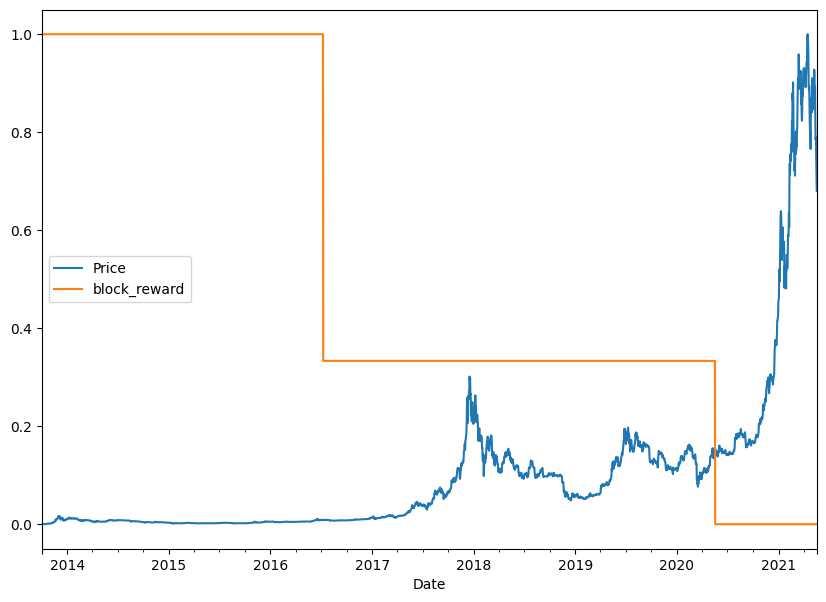

In [106]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(
    minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
    columns=bitcoin_prices_block.columns,
    index=bitcoin_prices_block.index
)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas
Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [107]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [108]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [109]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [110]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


What we've done is created a way to window our dataset directly from a pandas dataframe.
```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [111]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [112]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [113]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [114]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    # layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    verbose=1,
    validation_data=(X_test,y_test),
    callbacks=[create_model_checkpoint(model_name=model_6.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 17s - loss: 3735.0149

18/18 [==============================] - 2s 39ms/step - loss: 1988.5409 - val_loss: 2524.6003
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 343.3241

18/18 [==============================] - 1s 33ms/step - loss: 338.9114 - val_loss: 1329.4252
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 237.4928

18/18 [==============================] - 1s 34ms/step - loss: 235.0156 - val_loss: 1151.9143
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 208.8842

18/18 [==============================] - 1s 32ms/step - loss: 206.9827 - val_loss: 1132.9805
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 201.0751

18/18 [==============================] - 1s 36ms/step - loss: 201.0751 - val_loss: 1112.1859
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 201.0130 - val_loss: 1123.7821
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 205.8236

18/18 [==============================] - 1s 47ms/step - loss: 198.6928 - val_loss: 1071.7783
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 189.6558 - val_loss: 1074.4172
Epoch 9/100
15/18 [========================>.....] - ETA: 0s - loss: 187.4095

18/18 [==============================] - 1s 47ms/step - loss: 184.3074 - val_loss: 1047.8311
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 173.7868

18/18 [==============================] - 1s 39ms/step - loss: 178.4977 - val_loss: 993.4963
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 174.0157

18/18 [==============================] - 1s 33ms/step - loss: 173.8330 - val_loss: 955.3275
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 170.8816 - val_loss: 1026.0865
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 130.0681

18/18 [==============================] - 1s 54ms/step - loss: 167.3177 - val_loss: 942.7701
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 184.2632

18/18 [==============================] - 1s 33ms/step - loss: 161.7110 - val_loss: 935.5750
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 164.0988

18/18 [==============================] - 1s 33ms/step - loss: 159.8750 - val_loss: 919.0129
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 147.9519

18/18 [==============================] - 1s 32ms/step - loss: 154.3092 - val_loss: 887.8696
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 151.9748

18/18 [==============================] - 1s 33ms/step - loss: 152.1850 - val_loss: 856.5810
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 148.0029

18/18 [==============================] - 1s 31ms/step - loss: 148.0029 - val_loss: 840.6190
Epoch 19/100
16/18 [=========================>....] - ETA: 0s - loss: 145.6470

18/18 [==============================] - 1s 31ms/step - loss: 144.9252 - val_loss: 793.0767
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 144.7686 - val_loss: 794.4733
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 143.0653

18/18 [==============================] - 1s 30ms/step - loss: 143.0653 - val_loss: 761.2269
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 191.5581

18/18 [==============================] - 1s 30ms/step - loss: 139.4534 - val_loss: 744.1351
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 152.7875

18/18 [==============================] - 1s 31ms/step - loss: 134.0309 - val_loss: 732.1652
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 148.2473

18/18 [==============================] - 1s 29ms/step - loss: 132.7517 - val_loss: 725.3773
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 140.0981

18/18 [==============================] - 1s 29ms/step - loss: 130.3520 - val_loss: 708.5650
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 128.4781

18/18 [==============================] - 0s 29ms/step - loss: 129.1004 - val_loss: 697.8526
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 185.8897

18/18 [==============================] - 1s 29ms/step - loss: 127.7447 - val_loss: 688.3784
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 125.3496

18/18 [==============================] - 0s 29ms/step - loss: 125.5352 - val_loss: 688.1967
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 124.1600 - val_loss: 688.3263
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 128.8883 - val_loss: 733.4475
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 136.6797 - val_loss: 856.1531
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 145.3191

18/18 [==============================] - 1s 38ms/step - loss: 136.5643 - val_loss: 657.6324
Epoch 33/100
14/18 [======================>.......] - ETA: 0s - loss: 128.0320

18/18 [==============================] - 1s 42ms/step - loss: 126.8257 - val_loss: 655.2414
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 124.2071

18/18 [==============================] - 1s 42ms/step - loss: 121.1538 - val_loss: 648.9495
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 119.9901 - val_loss: 650.9015
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 127.4020 - val_loss: 710.8392
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 121.5501 - val_loss: 655.7170
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 123.1815

18/18 [==============================] - 1s 32ms/step - loss: 120.5675 - val_loss: 637.4733
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 119.7877 - val_loss: 669.7626
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 118.3925 - val_loss: 643.1439
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 109.2411

18/18 [==============================] - 1s 31ms/step - loss: 118.5069 - val_loss: 629.5264
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 113.4213

18/18 [==============================] - 1s 52ms/step - loss: 120.3270 - val_loss: 627.5217
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 116.9599 - val_loss: 633.9075
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 117.4103 - val_loss: 627.9702
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 118.5764 - val_loss: 630.7980
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 117.8680

18/18 [==============================] - 1s 31ms/step - loss: 117.8680 - val_loss: 620.0858
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 116.9967 - val_loss: 647.0292
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0575 - val_loss: 670.9222
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 118.4897 - val_loss: 624.3458
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 117.8550 - val_loss: 640.2576
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8832 - val_loss: 626.1955
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3108 - val_loss: 624.1116
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 64.9298

18/18 [==============================] - 1s 31ms/step - loss: 118.3601 - val_loss: 617.7110
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 117.7826 - val_loss: 629.6753
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 132.0468

18/18 [==============================] - 1s 31ms/step - loss: 115.3920 - val_loss: 611.5210
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 117.7283 - val_loss: 759.5016
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 137.8428 - val_loss: 618.1066
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 123.8801 - val_loss: 612.0777
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1102 - val_loss: 633.8267
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6464 - val_loss: 637.6459
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4905 - val_loss: 620.3241
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1253 - val_loss: 619.4420
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 100.8987

18/18 [==============================] - 1s 30ms/step - loss: 114.4441 - val_loss: 607.0566
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2436 - val_loss: 650.9180
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 140.8921

18/18 [==============================] - 0s 28ms/step - loss: 117.2651 - val_loss: 604.4208
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 121.2614

18/18 [==============================] - 1s 29ms/step - loss: 115.0312 - val_loss: 601.5682
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 111.9607 - val_loss: 689.3842
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 121.3886 - val_loss: 714.4554
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 126.0053 - val_loss: 657.8052
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 122.2738 - val_loss: 614.9585
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9660 - val_loss: 656.6350
Epoch 72/100
18/18 [==============================] - ETA: 0s - loss: 115.1388

18/18 [==============================] - 1s 30ms/step - loss: 115.1388 - val_loss: 598.4187
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4261 - val_loss: 607.5629
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 168.7526

18/18 [==============================] - 1s 30ms/step - loss: 112.6189 - val_loss: 591.7642
Epoch 75/100
 1/18 [>.............................] - ETA: 0s - loss: 126.4691

18/18 [==============================] - 1s 31ms/step - loss: 112.0029 - val_loss: 589.9991
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 80.2756

18/18 [==============================] - 0s 29ms/step - loss: 111.8311 - val_loss: 588.8403
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0110 - val_loss: 589.6895
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3274 - val_loss: 594.5670
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1076 - val_loss: 607.3235
Epoch 80/100
18/18 [==============================] - ETA: 0s - loss: 112.5517

18/18 [==============================] - 1s 40ms/step - loss: 112.5517 - val_loss: 588.0083
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 109.8904 - val_loss: 597.2982
Epoch 82/100
15/18 [========================>.....] - ETA: 0s - loss: 115.6031

18/18 [==============================] - 1s 44ms/step - loss: 116.0895 - val_loss: 585.5218
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 114.4454 - val_loss: 610.7063
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 115.2846 - val_loss: 586.7761
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 110.0680 - val_loss: 593.2087
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 109.6409 - val_loss: 610.7687
Epoch 87/100
14/18 [======================>.......] - ETA: 0s - loss: 114.5637

18/18 [==============================] - 1s 36ms/step - loss: 111.6851 - val_loss: 583.4227
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1716 - val_loss: 591.7968
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4873 - val_loss: 584.6832
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6662 - val_loss: 678.9235
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8645 - val_loss: 601.1569
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2313 - val_loss: 586.9558
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 115.8816 - val_loss: 631.5777
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7126 - val_loss: 592.1689
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 137.0649

18/18 [==============================] - 1s 31ms/step - loss: 109.9114 - val_loss: 579.4758
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 115.6936 - val_loss: 593.6072
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4599 - val_loss: 636.8969
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3731 - val_loss: 588.8514
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8281 - val_loss: 584.7644
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4477 - val_loss: 679.8708


In [115]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 679.8710


679.8709716796875

In [116]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 579.4760


579.4759521484375

In [117]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8902.801, 8779.951, 9004.866, 8802.808, 8747.888, 8783.424,
       8658.665, 8557.567, 8473.3  , 8520.572], dtype=float32)>

In [118]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 579.47595,
 'mse': 1204478.4,
 'rmse': 1097.4873,
 'mape': 2.608429,
 'mase': 1.0179788}

In [119]:
model_1_results

{'mae': 568.1438,
 'mse': 1161315.4,
 'rmse': 1077.6434,
 'mape': 2.5392282,
 'mase': 0.9980713}

## Model 7: N-BEATS algorithm
Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

### Building and testing the N-BEATS block layer
Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [120]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(
      self,
      input_size: int,
      theta_size: int,
      horizon: int,
      n_neurons: int,
      n_layers: int,
      # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
      **kwargs 
  ):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast



Let's test our NBeatsBlock class.

To do we'll make some dummy inputs and outputs.

In [121]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(
    input_size=WINDOW_SIZE,
    theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
    horizon=HORIZON,
    n_neurons=128,
    n_layers=4
)

In [122]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [123]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.26718622 -0.6241064  -0.22109506  0.00820795 -0.60442114  0.2542138
 -0.00127778]
Forecast: 0.15373685956001282


### Preparing data for the N-BEATS algorithm using tf.data
To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide: https://www.tensorflow.org/guide/data_performance

In [124]:
HORIZON = 1
WINDOW_SIZE = 7 

In [125]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [126]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [127]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [128]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm
The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [129]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections
Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet

In [130]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm
1. Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using tf.keras.Model()
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam . optimizer with default setting as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
* Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
* Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [131]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(
    input_size=INPUT_SIZE,
    theta_size=THETA_SIZE,
    horizon=HORIZON,
    n_neurons=N_NEURONS,
    n_layers=N_LAYERS,
    name="InitialBlock"
)
# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)):
  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
    input_size=INPUT_SIZE,
    theta_size=THETA_SIZE,
    horizon=HORIZON,
    n_neurons=N_NEURONS,
    n_layers=N_LAYERS,
    name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals
  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(
    inputs=stack_input,
    outputs=forecast
)

# 8. Compile model with MAE loss
model_7.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(
    train_dataset,
    epochs=N_EPOCHS,
    validation_data=test_dataset,
    verbose=0,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)
    ]
)


Epoch 803: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1057: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1157: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 4min 45s, sys: 7.65 s, total: 4min 53s
Wall time: 5min 29s


In [132]:
# Evaluate N-BEats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 20ms/step - loss: 573.4476


573.4476318359375

In [133]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8832.986, 8776.538, 9029.217, 8752.739, 8740.759, 8742.23 ,
       8642.165, 8506.329, 8463.343, 8508.609], dtype=float32)>

In [134]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 573.44763,
 'mse': 1152148.6,
 'rmse': 1073.3818,
 'mape': 2.5932086,
 'mase': 1.0073887}

In [135]:
model_1_results

{'mae': 568.1438,
 'mse': 1161315.4,
 'rmse': 1077.6434,
 'mape': 2.5392282,
 'mase': 0.9980713}

In [136]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Woah... even with all of those special layers and hand-crafted network, it looks like the N-BEATS model doesn't perform as well as model_1 or the original naive forecast.

This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certain type of data.

### Plotting the N-BEATS architecture we've created

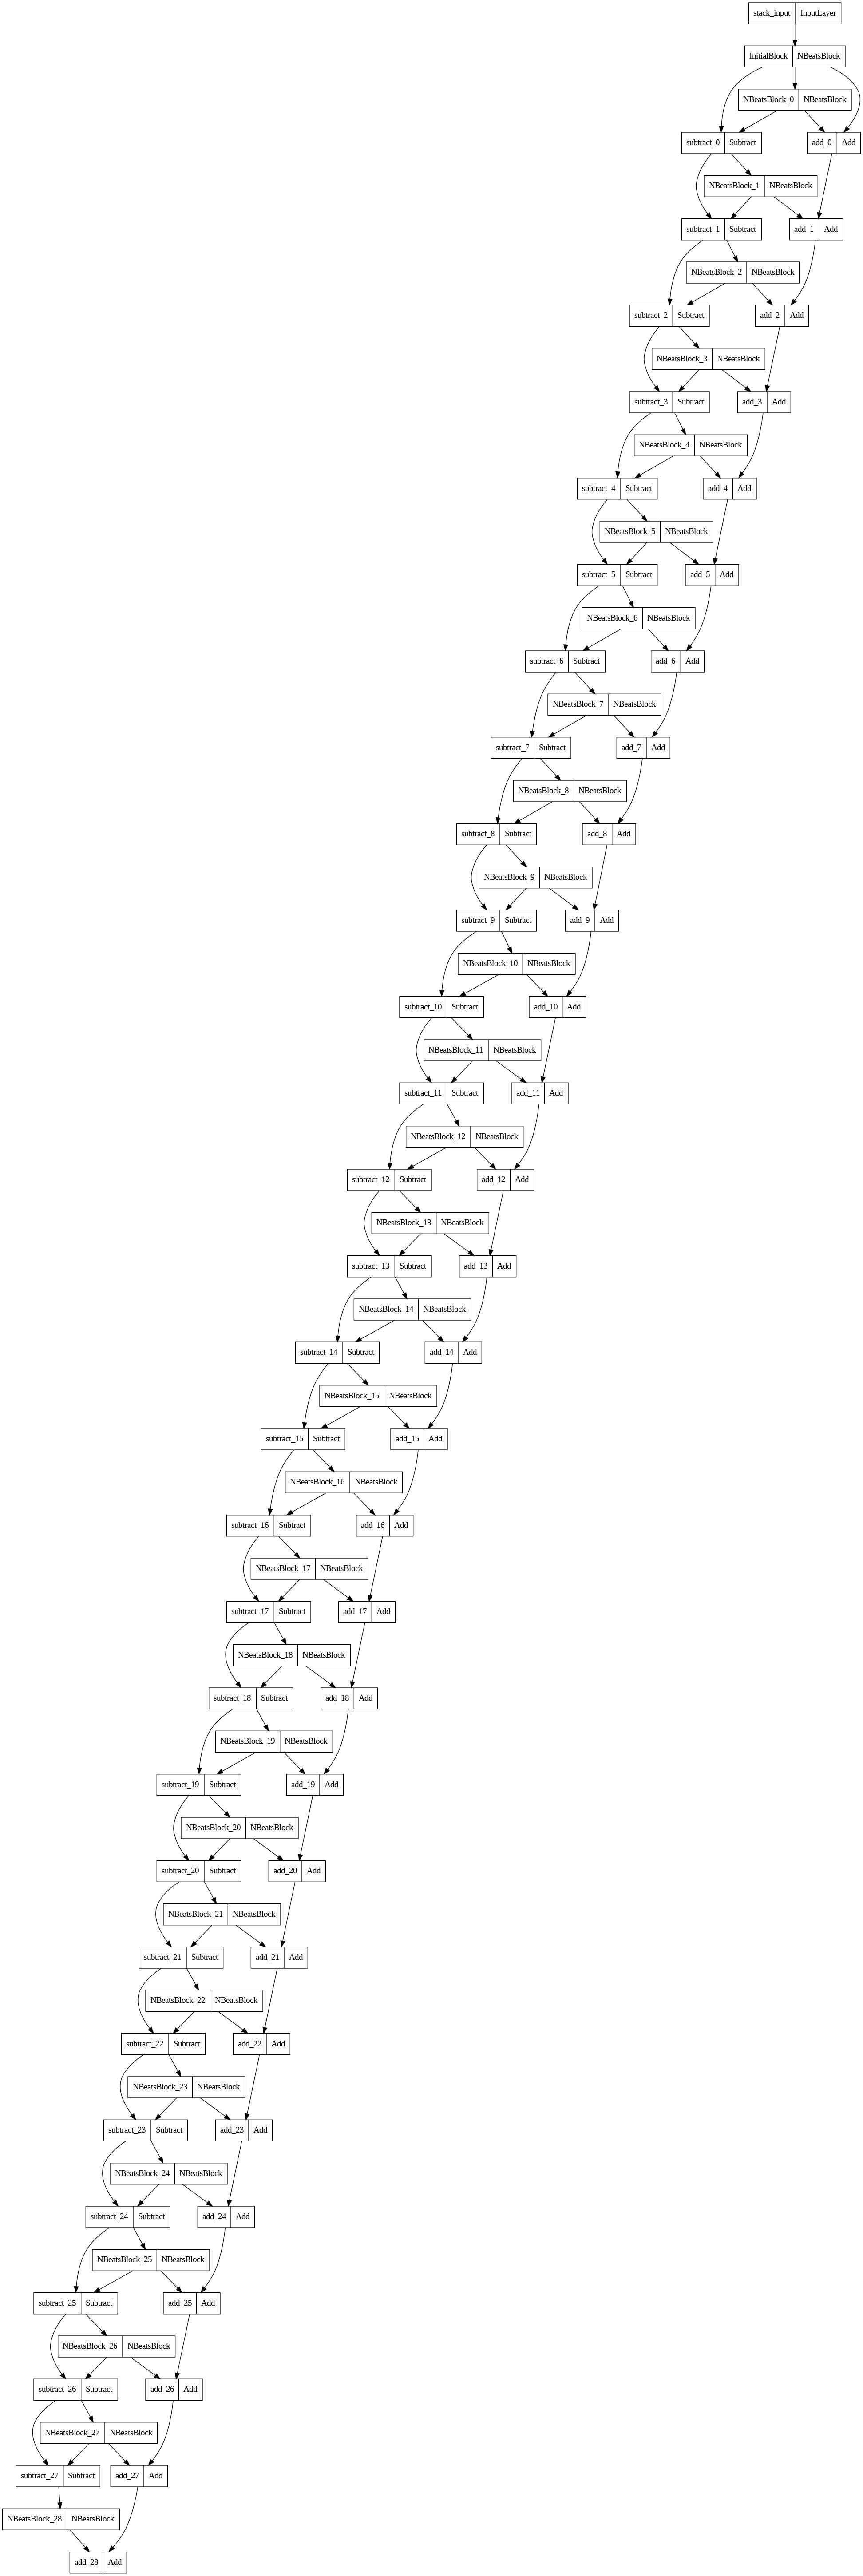

In [137]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)
An ensemble leverages the wisdom of the crowd effect.

It combines many different models to predict a common goal.

In [138]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting and ensemble of models (using different loss functions)

In [139]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned: 
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")
      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribution for estimating prediction intervals later on
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON),
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models 

In [140]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 436: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 536: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 220: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 320: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 395: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 953: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 837: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 937: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

### Make predictions with our ensemble model

In [142]:
ensemble_models

In [141]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [144]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)

1/1 [==============================] - 0s 25ms/step
CPU times: user 279 ms, sys: 19.3 ms, total: 299 ms
Wall time: 608 ms


In [145]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8761.559,  8762.273,  9127.472, ..., 49947.406, 48979.95 ,
        46245.586],
       [ 8789.942,  8739.561,  9035.536, ..., 50407.16 , 48482.098,
        45618.227],
       [ 8757.506,  8821.257,  9098.541, ..., 49586.562, 48764.707,
        45436.72 ],
       ...,
       [ 8769.888,  8818.627,  9068.594, ..., 49784.215, 48069.63 ,
        46154.887],
       [ 8782.901,  8759.242,  9058.536, ..., 50210.5  , 48211.508,
        45092.953],
       [ 8775.324,  8775.668,  9084.793, ..., 49524.734, 49119.676,
        45671.715]], dtype=float32)>

Our ensemble preds come out in multiple dimensions but to combine into** point predictions** we can leverage the mean of all of the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [146]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8778.675, 8777.178, 9064.077, 8708.484, 8749.734, 8737.295,
       8635.991, 8484.648, 8455.406, 8523.543], dtype=float32)>

In [147]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]


array([8775.324, 8775.668, 9060.027, 8726.587, 8750.855, 8746.813,
       8633.453, 8484.84 , 8460.054, 8516.425], dtype=float32)

In [148]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 568.55145,
 'mse': 1143006.5,
 'rmse': 1069.1149,
 'mape': 2.5614724,
 'mase': 0.9987874}

In [149]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 568.9411,
 'mse': 1149365.0,
 'rmse': 1072.0844,
 'mape': 2.559987,
 'mase': 0.9994719}

In [151]:
model_1_results

{'mae': 568.1438,
 'mse': 1161315.4,
 'rmse': 1077.6434,
 'mape': 2.5392282,
 'mase': 0.9980713}

## Plotting the prediction intervals (uncertainty estimates) of our ensemble
So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialzed models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To the get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)
* https://en.wikipedia.org/wiki/1.96
* https://eng.uber.com/neural-networks-uncertainty-estimation/

In [152]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  # 3. Multiply the standard deviation by 1.96 - 95% band of standard deviation
  interval = std * 1.96
  # 4. Geth the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [153]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

> 📖 Resource: Many of the steps we've taken above have inspired/referenced from the Machine Learning Mastery blog post on [Prediction Intervals for Deep Learning Neural Networks](https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/)

In [154]:
X_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

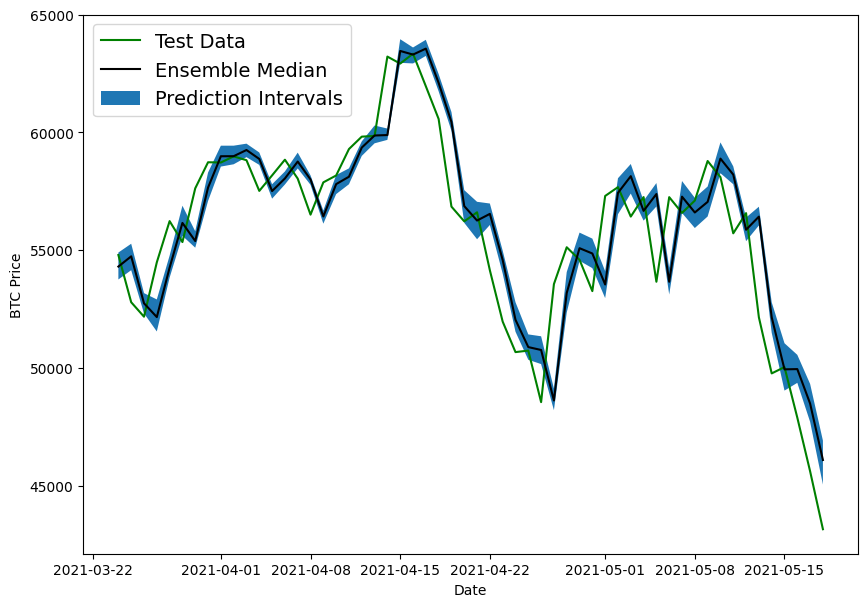

In [157]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)


# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(
    X_test.index[offset:],
    (lower)[offset:],
    (upper)[offset:],
    label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Hmm...

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep.

> 🔑 Note: These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

### Aside: two types of uncertainty (coconut and subway)
Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:

1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)
There are two major types of uncertainty in machine learning you should know about:

* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

We've only scratched the surface of uncertainty in machine but if you'd like to learn more, I'd highly recommend checking out the resources located here: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#learning-more-on-uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future
So far all of our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future!

In [158]:
HORIZON = 1
WINDOW_SIZE = 7

In [159]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [160]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [161]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [162]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [163]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [164]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [165]:
# How many timestesp to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
* a list of values (Bitcoin historical data)
* a trained model (such as model_9)
* a window into the future to predict (our INTO_FUTURE variable)
* the window size a model was trained on (WINDOW_SIZE) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last WINDOW_SIZE values from the input values
3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE sequences which update to remove the first value and append the latest prediction

In [166]:
tf.expand_dims(y_all[-WINDOW_SIZE:], axis=0)

<tf.Tensor: shape=(1, 7), dtype=float64, numpy=
array([[56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361, 43144.47129086]])>

In [169]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future=INTO_FUTURE, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-window_size:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(into_future):
    # Predict on the last window then append it again, again, again 
    # (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds 
    # (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

> 🛠 Exercise: In terms of a forecasting model, what might another approach to our make_future_forecasts() function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.
So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.
As it is, the make_future_forecasts() function skips the retraining of a model part.

In [170]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 63ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55859.5

1/1 [==============================] - 0s 21ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55859.5       ] -> Prediction: 50832.4375

1/1 [==============================] - 0s 33ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55859.5        50832.4375    ] -> Prediction: 49544.21875

1/1 [==============================] - 0s 24ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55859.5        50832.4375     49544.21875   ] -> Prediction: 50359.3359375

1/1 [==============================] - 0s 24ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55859.5
 50832.4375     49544.21875    50359.3359375 ] -> Prediction: 466

### Plot future forecasts

In [171]:
future_forecast

[55859.5,
 50832.438,
 49544.22,
 50359.336,
 46647.844,
 46792.402,
 47321.42,
 54473.812,
 50276.43,
 49657.195,
 50042.5,
 46667.273,
 48405.8,
 49624.973]

In [172]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date
 

In [173]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [174]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [175]:
bitcoin_prices.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

In [176]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55859.5  , 50832.438, 49544.22 , 50359.336, 46647.844,
        46792.402, 47321.42 , 54473.812, 50276.43 , 49657.195, 50042.5  ,
        46667.273, 48405.8  , 49624.973], dtype=float32))

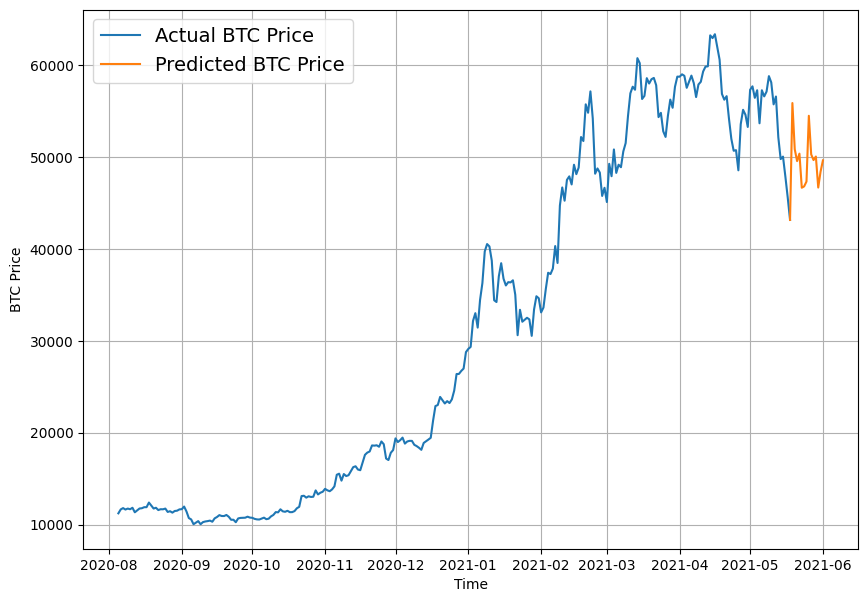

In [178]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem 🦃)

In [179]:
# Let's introduce a turkey prolbme to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [180]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [181]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

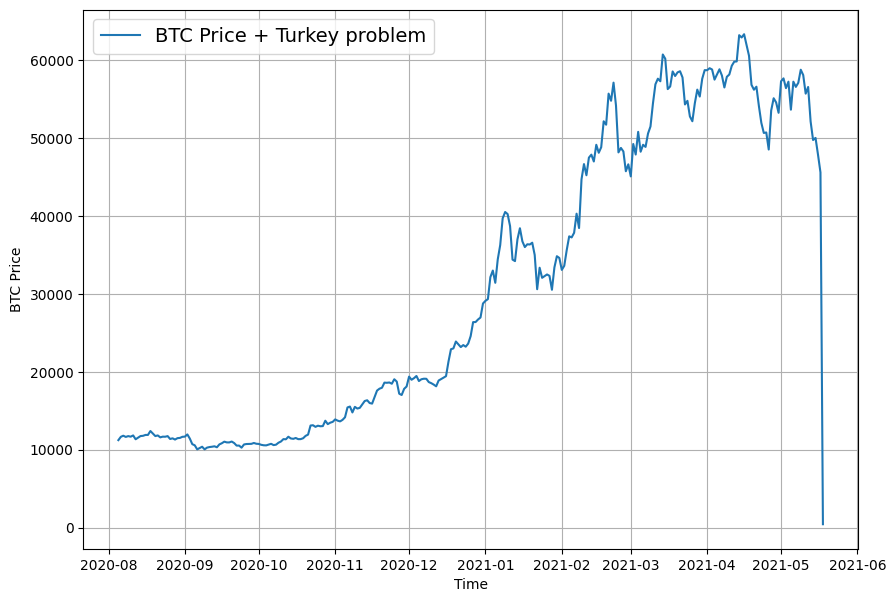

In [182]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [183]:
HORIZON = 1
WINDOW_SIZE = 7

In [184]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [185]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


### Build a turkey model (model to predict on turkey data)

In [187]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [188]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 738.5149


738.514892578125

In [189]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 644.6732


644.6732177734375

In [190]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8892.312, 8778.197, 9026.089, 8822.443, 8752.658, 8749.089,
       8711.758, 8522.36 , 8485.038, 8531.801], dtype=float32)>

In [191]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17128.715,
 'mse': 614402240.0,
 'rmse': 23713.965,
 'mape': 121.36044,
 'mase': 26.506739}

In [192]:
model_1_results

{'mae': 568.1438,
 'mse': 1161315.4,
 'rmse': 1077.6434,
 'mape': 2.5392282,
 'mase': 0.9980713}

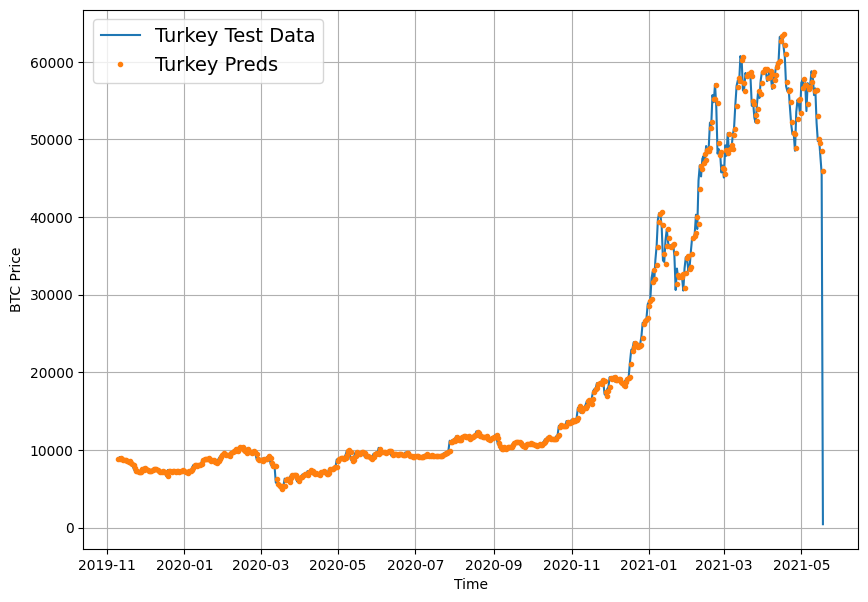

In [193]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):], 
                 format="-",
                 label="Turkey Test Data", 
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

## Compare models

In [194]:
ensemble_results

{'mae': 579.22046,
 'mse': 1173484.2,
 'rmse': 1083.2258,
 'mape': 2.6249468,
 'mase': 1.01753}

In [195]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)  

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.143799,1.161315e+06,1077.643433,2.539228,0.998071
model_2_dense_w30_h1,598.217529,1.272832e+06,1128.198608,2.736784,1.045690
model_3_dense_w30_h7,1248.439941,5.494926e+06,1439.111328,5.584575,2.221529
model_4_CONV1D,571.750000,1.183783e+06,1088.018066,2.569297,1.004406
model_5_LSTM,578.760010,1.207220e+06,1098.735352,2.617764,1.016721
model_6_multivariate,579.475952,1.204478e+06,1097.487305,2.608429,1.017979
model_7_NBEATS,573.447632,1.152149e+06,1073.381836,2.593209,1.007389
model_8_ensemble,579.220459,1.173484e+06,1083.225830,2.624947,1.017530
model_10_turkey,17128.714844,6.144022e+08,23713.964844,121.360443,26.506739


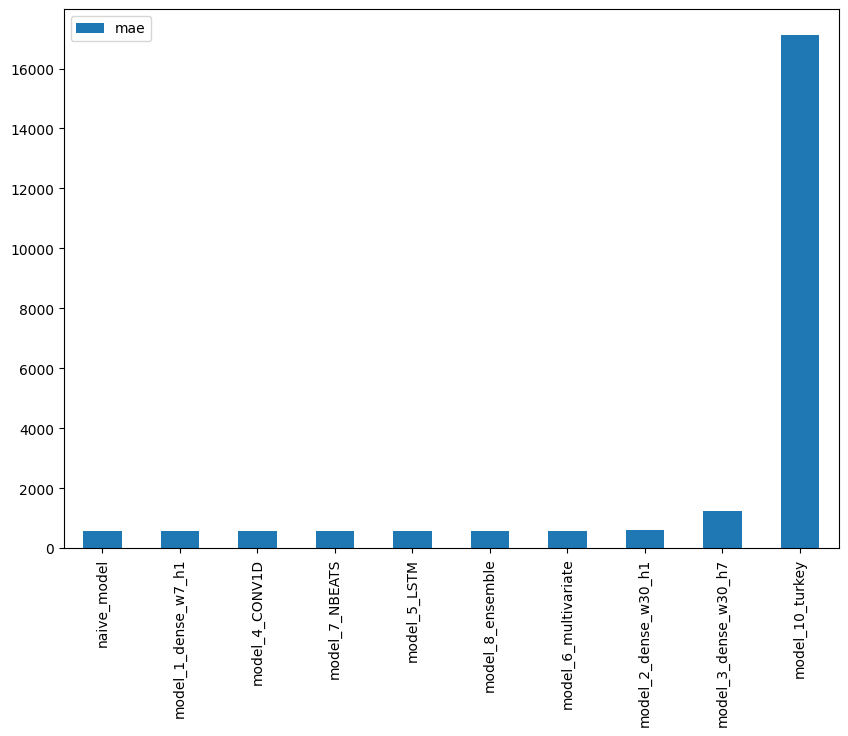

In [196]:
# Sort model results by MAE and plot them 
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

### Exercises and extra curriculum
What a journey we've been on!

Thank you so much for following along.

For all the exercises and extra curriculum related to this section, please refer to the course GitHub: https://github.com/mrdbourke/tensorflow-deep-learning#course-materials